In [ ]:
#Bibliotecas necessárias

import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Derivadas parciais

def dif_1(f,x,y):
  h=1e-4
  d=(f(x+h,y)-f(x-h,y))/(2*h)
  return d
def dif_2(f,x,y):
  h=1e-4
  d=(f(x,y+h)-f(x,y-h))/(2*h)
  return d

#Produto interno

def produto_interno(a,b):
  n=len(a)
  soma=0
  for k in range(n):
    soma=soma+a[k]*b[k]
  return soma

#RK

def rk_duas_coordenadas(x,y,z,t0,t,h,u_0,u1_0,v_0,v1_0):

  # x(u,v), y(u,v), z(u,v) coordenadas da superfície
  # t0 tempo inicial, t tempo final
  # h passo
  # Valores iniciais: u(0)=u_0, u'(0)=u1_0, v(0)=v_0, v'(0)=v1_0

  #Derivadas parciais de cada coordenada
  x_u=lambda u,v:dif_1(x,u,v)
  y_u=lambda u,v:dif_1(y,u,v)
  z_u=lambda u,v:dif_1(z,u,v)
  x_v=lambda u,v:dif_2(x,u,v)
  y_v=lambda u,v:dif_2(y,u,v)
  z_v=lambda u,v:dif_2(z,u,v)

  #Derivadas parciais da superfície
  X_u=lambda u,v:[x_u(u,v),y_u(u,v),z_u(u,v)]
  X_v=lambda u,v:[x_v(u,v),y_v(u,v),z_v(u,v)]

  #Primeira forma fundamental
  E=lambda u,v:produto_interno(X_u(u,v),X_u(u,v))
  F=lambda u,v:produto_interno(X_u(u,v),X_v(u,v))
  G=lambda u,v:produto_interno(X_v(u,v),X_v(u,v))

  #Derivadas parciais da primeira forma
  E_u=lambda u,v:dif_1(E,u,v)
  F_u=lambda u,v:dif_1(F,u,v)
  G_u=lambda u,v:dif_1(G,u,v)
  E_v=lambda u,v:dif_2(E,u,v)
  F_v=lambda u,v:dif_2(F,u,v)
  G_v=lambda u,v:dif_2(G,u,v)

  #Símbolos de Christoffel
  C_11_1=lambda u,v:(G(u,v)*E_u(u,v) -2*F(u,v)*F_u(u,v)+F(u,v)*E_v(u,v))/\
  (2*(E(u,v)*G(u,v) -F(u,v)**2))
  C_12_1=lambda u,v:(G(u,v)*E_v(u,v) -F(u,v)*G_u(u,v))/\
  (2*(E(u,v)*G(u,v)-F(u,v)**2))
  C_22_1=lambda u,v:(2*G(u,v)*F_v(u,v) -G(u,v)*G_u(u,v)-F(u,v)*G_v(u,v))/\
  (2*(E(u,v)*G(u,v) -F(u,v)**2))
  C_11_2=lambda u,v:(-F(u,v)*E_u(u,v) +2*E(u,v)*F_u(u,v)-E(u,v)*E_v(u,v))/\
  (2*(E(u,v)*G(u,v) -F(u,v)**2))
  C_12_2=lambda u,v:(-F(u,v)*E_v(u,v) +E(u,v)*G_u(u,v))/\
  (2*(E(u,v)*G(u,v) -F(u,v)**2))
  C_22_2=lambda u,v:(-2*F(u,v)*F_v(u,v) +F(u,v)*G_u(u,v)+E(u,v)*G_v(u,v))/\
  (2*(E(u,v)*G(u,v) -F(u,v)**2))

  #Sistema de quatro EDOs de primeira ordem
  f1=lambda t,u,u1,v,v1:u1
  f2=lambda t,u,u1,v,v1:v1
  ff=lambda t,u,u1,v,v1:-C_11_1(u,v)*(f1(t,u,u1,v,v1)**2)\
  -2*C_12_1(u,v)*(f1(t,u,u1,v,v1)*f2(t,u,u1,v,v1))\
  -C_22_1(u,v)*(f2(t,u,u1,v,v1)**2)
  gg=lambda t,u,u1,v,v1:-C_11_2(u,v)*(f1(t,u,u1,v,v1)**2)\
  -2*C_12_2(u,v)*(f1(t,u,u1,v,v1)*f2(t,u,u1,v,v1))\
  -C_22_2(u,v)*(f2(t,u,u1,v,v1)**2)

  #Runge Kutta
  FF=lambda t,u,u1,v,v1:np.array([f1(t,u,u1,v,v1),ff(t,u,u1,v,v1),\
  f2(t,u,u1,v,v1),gg(t,u,u1,v,v1)])

  X0=np.array([u_0,u1_0,v_0,v1_0])
  xx,tt=[ ],[ ]
  xx.append(X0)
  tt.append(t0)
  while t0 < t:
    K1=FF(t0,X0[0],X0[1],X0[2],X0[3])
    K2=FF(t0+h/2, (X0+(K1*h)/2)[0],(X0+(K1*h)/2)[1],\
    (X0+(K1*h)/2)[2],(X0+(K1*h)/2)[3])
    K3=FF(t0+h/2, (X0+(K2*h)/2)[0],(X0+(K2*h)/2)[1],\
    (X0+(K2*h)/2)[2],(X0+(K2*h)/2)[3])
    K4=FF(t0+h, (X0+K3*h)[0],(X0+K3*h)[1],\
    (X0+K3*h)[2],(X0+K3*h)[3])
    X1=X0+h*(K1+(2*K2)+(2*K3)+K4)/6
    xx.append(X1)
    t1=t0+h
    tt.append(t1)
    t0=t1
    X0=X1
  return [np.array(tt),np.array(xx)[:,0],np.array(xx)[:,2]]

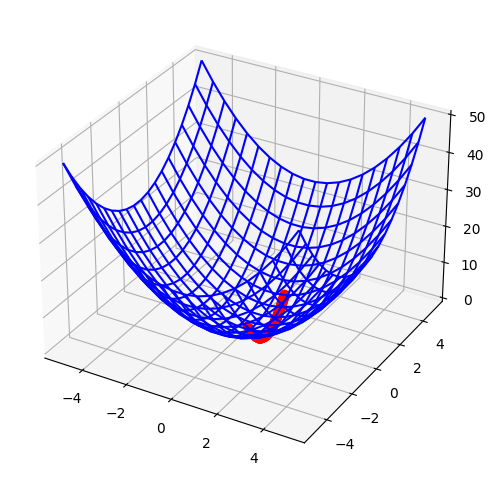

In [ ]:
#Parametrização

x=lambda u,v:u
y=lambda u,v:v
z=lambda u,v:np.power(u,2)+np.power(v,2)
t=[ ]
for k in range(2):
  th=np.radians(90-60*k)
  u1_0=1
  v1_0=-1
  rk=rk_duas_coordenadas(x,y,z,0,20,0.1,0,u1_0,0,v1_0)
  t.append([rk[1],rk[2]])
t=np.array(t)
x1=t[0,0]
y1=t[0,1]
z1=np.power(t[0,0],2)+np.power(t[0,1],2)
#x2=1.5*np.sin(t[1,0])*np.cos(t[1,1])
#y2=0.7*np.sin(t[1,0])*np.sin(t[1,1])
#z2=0.7*np.cos(t[1,0])

u = np.linspace(-5, 5, 20)
v = np.linspace(-5, 5, 20)
u,v = np.meshgrid(u,v)
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x(u,v),y(u,v),z(u,v), color='blue')
ax.plot(x1, y1, z1, 'ro')
#ax.plot(x2, y2, z2, 'go')